<a href="https://colab.research.google.com/github/reeda23/OpenCV102-Morphological-Operations/blob/main/1_Basic_Morphological_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#custom function for displaying image

def plt_showimage(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

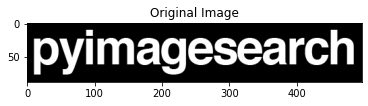

In [3]:
#read image and convert it into gray scale and then display it
image = cv2.imread("/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/pyimagesearch_logo.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_showimage("Original Image", gray)

**EROSIONS**

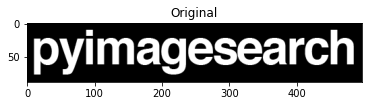

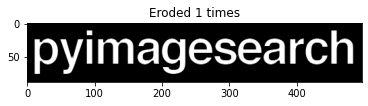

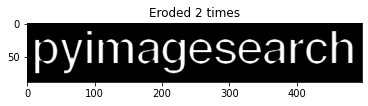

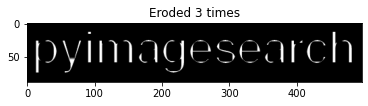

In [4]:
#erosion will eat away all pixels near the border 

plt_showimage("Original", image)
#Now apply erosion operation to image
for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i + 1) 
    #first argument is image which we want to pass
    #second argument is structuring element like 4 neighbourhood or 8 neighbourhood
    #none mean 3x3 8 neighbourhood
    #final argument is no of times we want to erode
    plt_showimage("Eroded {} times".format(i+1), eroded)

**Dilation**

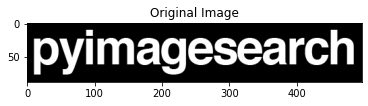

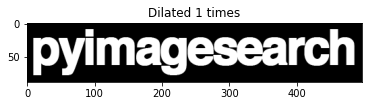

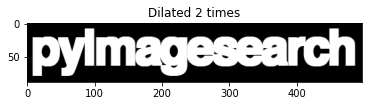

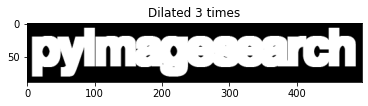

In [5]:
#dilation will grow pixels foreground pixels around the borders
plt_showimage("Original Image", image)

for i in range(0, 3):
    dilated_image = cv2.dilate(gray.copy(), None, iterations = i+1)
    plt_showimage("Dilated {} times".format(i+1), dilated_image)

In [10]:

#specifiying list of kernels
kernelSizes = [(3, 3), (5, 5), (7, 7)]

#read image and convert it into gray scale and then display it
nosiy_image = cv2.imread("/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/pyimagesearch_logo_noise.png")
noisy_image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**Opening**

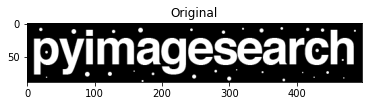

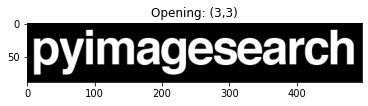

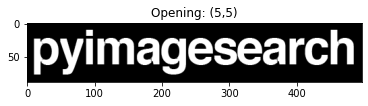

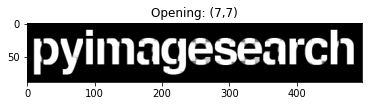

In [12]:
#opening is erosion followed by dilation
plt_showimage("Original", nosiy_image)
for kernelSize in kernelSizes:
    #first consturct a kernel
    #then apply opening operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(noisy_image_gray.copy(),cv2.MORPH_OPEN,kernel)
    plt_showimage("Opening: ({},{})".format(kernelSize[0],kernelSize[1]), opening)



**Closing**

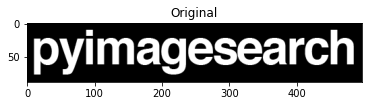

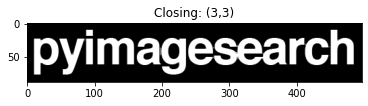

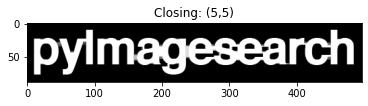

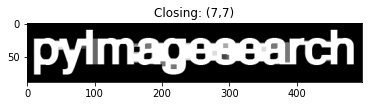

In [14]:
#closing is dilation followed by erosion
plt_showimage("Original", image)
for kernelSize in kernelSizes:
    #first consturct a kernel
    #then apply opening operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray.copy(),cv2.MORPH_CLOSE,kernel)
    plt_showimage("Closing: ({},{})".format(kernelSize[0],kernelSize[1]), opening)


**Morphological Gradient**

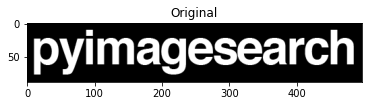

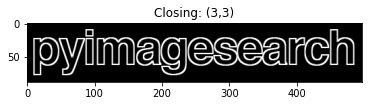

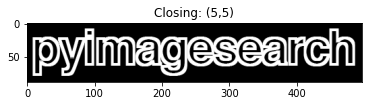

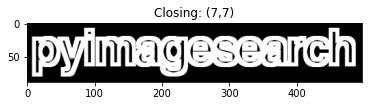

In [15]:
#diff between dilation and erosion
#used for determining the outline of the object

plt_showimage("Original", image)
for kernelSize in kernelSizes:
    #first consturct a kernel
    #then apply opening operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray.copy(),cv2.MORPH_GRADIENT,kernel)
    plt_showimage("Closing: ({},{})".format(kernelSize[0],kernelSize[1]), opening)

**Top/White and Black Hat**

In [20]:
#diff between input(gray scale image) and opening
#is used to reveal bright regions of an image on dark backgrounds
#load image and convert it into gray scale

image = cv2.imread('/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/car.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#making a rectangle kernel because we want to detect liscense plate
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))

#BLACK HAT
# operation which enables us to find dark regions on a light
# background
blackHat = cv2.morphologyEx(gray_image, cv2.MORPH_BLACKHAT, rectKernel)
whiteHat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, rectKernel)

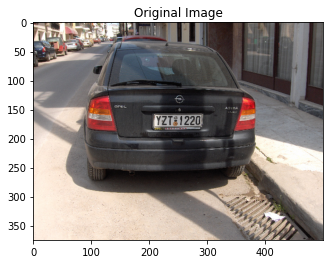

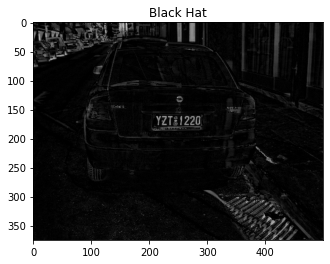

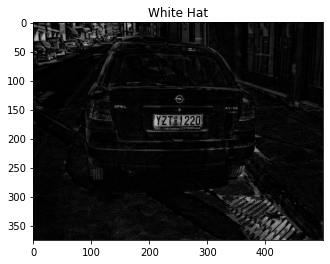

In [21]:
plt_showimage("Original Image", image)
plt_showimage("Black Hat", blackHat)
plt_showimage("White Hat",whiteHat)

In [25]:

#To reveal our license plate characters you would first segment out the license plate itself
#via a top hat operator and then apply a black hat operator

image = cv2.imread('/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/car.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#making a rectangle kernel because we want to detect liscense plate
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))


whiteHat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, rectKernel)
blackHat = cv2.morphologyEx(gray_image, cv2.MORPH_BLACKHAT, rectKernel)

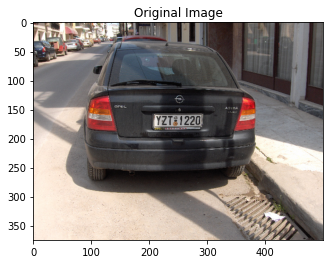

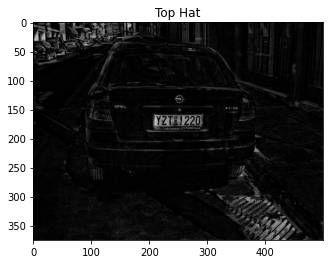

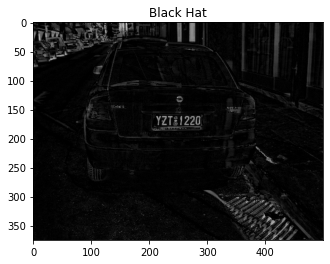

In [26]:
plt_showimage("Original Image", image)
plt_showimage("Top Hat", whiteHat)
plt_showimage("Black Hat",blackHat)